# Proyecto 01: Predicción de Precios y Demanda de Hoteles 🏨

Este notebook utiliza el dataset **Hotel Booking Demand** de Kaggle:
[Hotel Booking Demand Dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

Flujo del notebook:
1. Exploración y análisis de datos (EDA).
2. Preprocesamiento.
3. Modelado (regresión y clasificación).
4. Evaluación de resultados.
---

## 1. Importar librerías

In [10]:
#%pip install matplotlib seaborn pandas numpy scikit-learn xgboost lightgbm catboost optuna mlflow shap missingno

In [ ]:
#%pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb

## 2. Cargar dataset
Descarga el dataset desde Kaggle y colócalo en la carpeta `data/`.

In [12]:
# Cargar dataset
data = pd.read_csv("C:\\Users\\Danilo\\Documents\\Proyectos Full\\IA\\AI-Portfolio-DaniloRivera\\Proyecto01_Prediccion_Precios_Hoteles\\data\\hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 3. Exploración de datos (EDA)

In [28]:
print(data.shape)

(118902, 32)


In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
print(data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [16]:
# Valores nulos
print(data.isnull().sum().sort_values(ascending=False).head(20))

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
dtype: int64


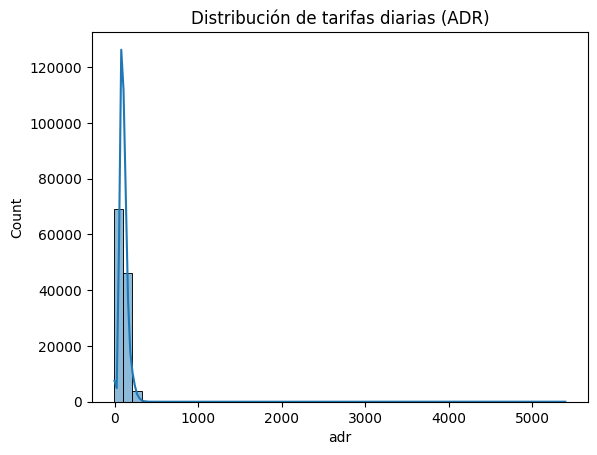

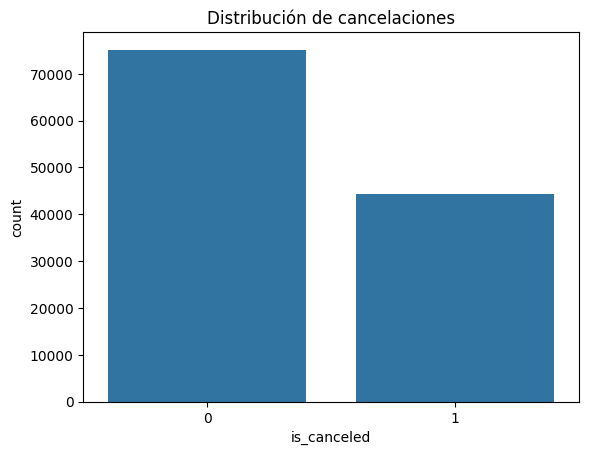

In [19]:
# Visualización simple de la variable objetivo adr (precio por noche)
sns.histplot(data['adr'], bins=50, kde=True)
plt.title('Distribución de tarifas diarias (ADR)')
plt.show()

# Cancelaciones
sns.countplot(x='is_canceled', data=data)
plt.title('Distribución de cancelaciones')
plt.show()

## 4. Preprocesamiento
- Tratamiento de nulos.
- Codificación de variables categóricas.
- División train/test.

In [29]:
# Ejemplo simple: eliminar nulos en columnas importantes
data = data.dropna(subset=['adr', 'is_canceled', 'hotel', 'country','children'])

In [30]:
data = data.drop(columns=['company', 'agent'])


In [31]:
# Variables numéricas y categóricas
features = data.drop(columns=['adr', 'is_canceled'])
target_price = data['adr']  # variable objetivo para regresión
target_cancel = data['is_canceled']  # variable objetivo para clasificación

In [32]:
# Codificación de variables categóricas (one-hot encoding)
features_encoded = pd.get_dummies(features, drop_first=True)


In [33]:
# División de datos
X_train, X_test, y_train_p, y_test_p = train_test_split(features_encoded, target_price, test_size=0.2, random_state=42)
_, _, y_train_c, y_test_c = train_test_split(features_encoded, target_cancel, test_size=0.2, random_state=42)

## 5. Modelado
- **Regresión**: Predicción de `adr` (precio por noche).
- **Clasificación**: Predicción de `is_canceled` (cancelación).

In [34]:
# Modelo de regresión: Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train_p)

RandomForestRegressor(random_state=42)

In [35]:
y_pred_reg = rf_reg.predict(X_test)

In [38]:
# Modelo de clasificación: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_c)


RandomForestClassifier(random_state=42)

In [39]:
y_pred_clf = rf_clf.predict(X_test)

In [41]:
# Modelo boosting: XGBoost (regresión)
xgb_reg = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train, y_train_p)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
y_pred_xgb = xgb_reg.predict(X_test)

## 6. Evaluación de Modelos

In [40]:


def evaluar_clasificacion(y_true, y_pred, nombre):
    acc = accuracy_score(y_true, y_pred)
    print(f"{nombre} -> Accuracy: {acc:.2f}")
    print(classification_report(y_true, y_pred))

# Evaluación ejemplos:
# evaluar_regresion(y_test_p, y_pred_reg, "Random Forest - ADR")
# evaluar_regresion(y_test_p, y_pred_xgb, "XGBoost - ADR")
evaluar_clasificacion(y_test_c, y_pred_clf, "Random Forest - Cancelación")

Random Forest - Cancelación -> Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14851
           1       1.00      1.00      1.00      8929

    accuracy                           1.00     23780
   macro avg       1.00      1.00      1.00     23780
weighted avg       1.00      1.00      1.00     23780



In [36]:
def evaluar_regresion(y_true, y_pred, nombre):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{nombre} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

In [37]:
# Evaluación ejemplos:
evaluar_regresion(y_test_p, y_pred_reg, "Random Forest - ADR")

Random Forest - ADR -> MAE: 8.07, RMSE: 22.45, R2: 0.78


In [43]:
evaluar_regresion(y_test_p, y_pred_xgb, "XGBoost - ADR")

XGBoost - ADR -> MAE: 12.21, RMSE: 19.90, R2: 0.83


## 7. Conclusiones y Próximos Pasos
- Analizar las variables que más afectan al precio (`adr`).
- Mejorar hiperparámetros de modelos (GridSearchCV, RandomizedSearchCV).
- Explorar modelos de boosting como LightGBM o CatBoost.
- Profundizar en la predicción de cancelaciones.
- Realizar visualizaciones avanzadas por país, temporada y tipo de hotel.